In [ ]:
import pandas as pd
import pandas_datareader.data as pdr
import seaborn as sns
import datetime as dt
import numpy as np

In [7]:
## SETTING AND PARSING DATES
today = dt.datetime.today()
end = today.strftime('%Y-%m-%d')
start = dt.datetime.strptime('2019-01-01', '%Y-%m-%d')
start = start.strftime('%Y-%m-%d')

In [4]:
start

'2019-01-01'

In [6]:
end

'2020-08-27'

In [3]:
## OBTAINING PRICES DATA
btc = pdr.DataReader('BTC-USD','yahoo',start=start, end=end)
bnb_btc = pdr.DataReader('BNB-BTC','yahoo',start=start, end=end)
xlm_btc = pdr.DataReader('XLM-BTC','yahoo',start=start, end=end)
eth_btc = pdr.DataReader('ETH-BTC','yahoo',start=start, end=end)
neo_btc = pdr.DataReader('NEO-BTC','yahoo',start=start, end=end)

In [5]:
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580
...,...,...,...,...,...,...
2020-08-22,11713.429688,11559.920898,11679.696289,11664.847656,1.848206e+10,11664.847656
2020-08-23,11807.631836,11623.250000,11663.689453,11774.595703,2.068151e+10,11774.595703
2020-08-24,11778.299805,11189.850586,11773.588867,11366.134766,2.630151e+10,11366.134766


In [8]:
## CALCULATE RETURNS
ret_bnb = bnb_btc.loc[:,'Adj Close'].pct_change().dropna()
ret_xlm = xlm_btc.loc[:,'Adj Close'].pct_change().dropna()
ret_eth = eth_btc.loc[:,'Adj Close'].pct_change().dropna()
ret_neo = neo_btc.loc[:,'Adj Close'].pct_change().dropna()

In [9]:
ret_bnb

Date
2019-01-02   -0.007147
2019-01-03   -0.019544
2019-01-04    0.021788
2019-01-05    0.003324
2019-01-06   -0.005387
                ...   
2020-08-22   -0.015160
2020-08-23    0.023973
2020-08-24   -0.015869
2020-08-25    0.026306
2020-08-27    0.008622
Name: Adj Close, Length: 603, dtype: float64

In [10]:
## CONVERTING INTO PANDAS DFs
df_bnb = pd.DataFrame(ret_bnb)
df_xlm = pd.DataFrame(ret_xlm)
df_eth = pd.DataFrame(ret_eth)
df_neo = pd.DataFrame(ret_neo)

In [11]:
df_bnb

,Adj Close
Date,
2019-01-02,-0.007147
2019-01-03,-0.019544
2019-01-04,0.021788
2019-01-05,0.003324
2019-01-06,-0.005387
...,...
2020-08-22,-0.015160
2020-08-23,0.023973
2020-08-24,-0.015869


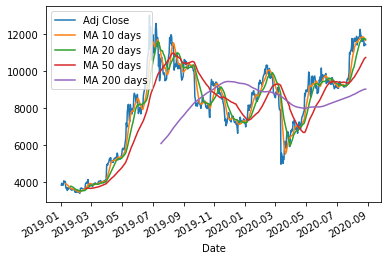

In [12]:
## CREATING MOVING AVERAGE COLUMNS AND PLOTTING
ma_days = [10,20,50,200]
for ma in ma_days:
    col_name = "MA %s days" % (str(ma))
    btc[col_name] = btc['Adj Close'].rolling(window=ma, center=False).mean()

btc.loc[:,['Adj Close','MA 10 days','MA 20 days','MA 50 days','MA 200 days' ]].plot(legend=True)

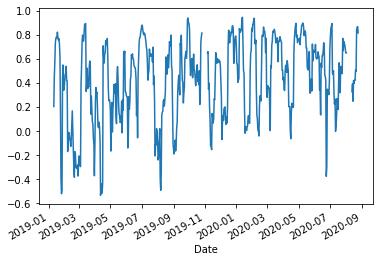

In [13]:
## PLOTTING CORRELATION BTW BNB & ETH
corr = ret_bnb.rolling('10D', min_periods=10).corr(ret_eth).plot()

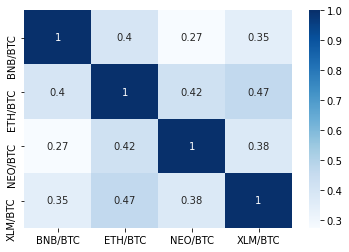

In [14]:
## NUMPY ARRAY TO CREATE CORRELATION MATRIX
corrs = np.corrcoef([ret_bnb,ret_eth,ret_neo,ret_xlm])
sns.heatmap(corrs,xticklabels=['BNB/BTC', 'ETH/BTC', 'NEO/BTC', 'XLM/BTC'],yticklabels=['BNB/BTC', 'ETH/BTC', 'NEO/BTC', 'XLM/BTC'],annot=True,cmap='Blues')

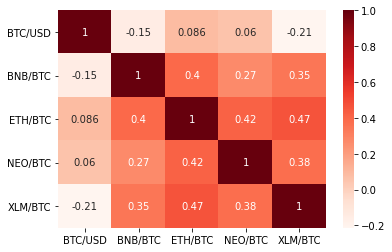

In [15]:
## CORRELATION MATRIX INCLUDING BTC
ret_btc = btc.loc[:,'Adj Close'].pct_change().dropna()
corr_btc = np.corrcoef([ret_btc,ret_bnb,ret_eth,ret_neo,ret_xlm])
sns.heatmap(corr_btc,xticklabels=['BTC/USD','BNB/BTC', 'ETH/BTC', 'NEO/BTC', 'XLM/BTC'],yticklabels=['BTC/USD','BNB/BTC', 'ETH/BTC', 'NEO/BTC', 'XLM/BTC'],annot=True,cmap='Reds')